In [1]:
# importe required libraries
import openpyxl
import csv
import pandas as pd
import matplotlib.pylab as plt 

In [2]:
# open given workbook 
# and store in excel object 
excel = openpyxl.load_workbook("C:/Users/Swetha/Downloads/EastWestAirlines.xlsx")

In [3]:
# select the active sheet
sheet = excel.active

In [4]:
# writer object is created
col = csv.writer(open("tt.csv",
                      'w', 
                      newline=""))

In [5]:
# writing the data in csv file
for r in sheet.rows:
    # row by row write 
    # operation is perform
    col.writerow([cell.value for cell in r])

In [6]:
# read the csv file and 
# convert into dataframe object 
Airlines = pd.DataFrame(pd.read_csv("tt.csv"))
  
# show the dataframe
Airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0
3967,3990,26504,0,2,1,1,10599,29,1000,7,1445,0
3968,3991,62907,0,1,1,1,3200,3,200,1,1431,0
3969,3992,12532,0,1,1,1,2069,9,0,0,1445,0


In [7]:
#Normalization function
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [8]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(Airlines.iloc[:,1:])


In [9]:
from scipy.cluster.hierarchy import linkage 

import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [10]:
type(df_norm)

pandas.core.frame.DataFrame

In [11]:
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="complete",metric="euclidean")

Text(0, 0.5, 'Distance')

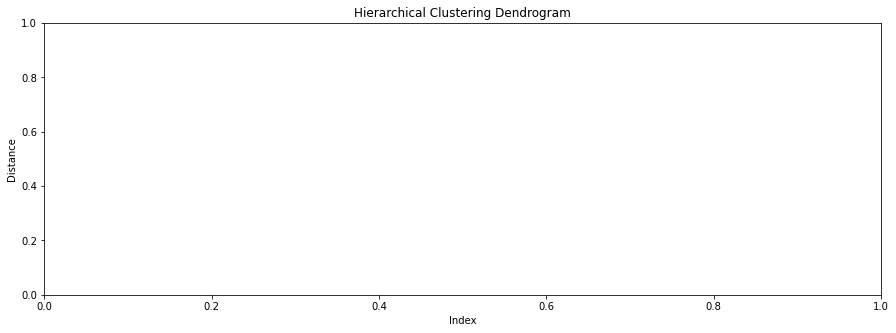

In [12]:
plt.figure(figsize=(15, 5));
plt.title('Hierarchical Clustering Dendrogram');
plt.xlabel('Index');
plt.ylabel('Distance')

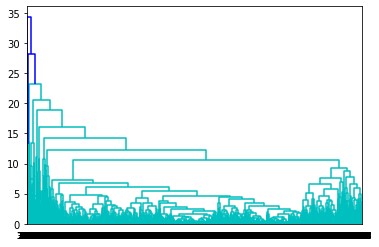

In [29]:
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering 
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity="euclidean").fit(df_norm)

In [31]:
cluster_labels=pd.Series(h_complete.labels_)

In [59]:
Airlines['clust']=cluster_labels # creating a  new column and assigning it to new column 
Airlines = Airlines.iloc[:,[5,0,1,2,3,4]]
Airlines.head()

<ipython-input-59-c1d1a2e12dce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airlines['clust']=cluster_labels # creating a  new column and assigning it to new column


,ID#,clust,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
0,1,0,1,1,1,174
1,2,0,1,1,1,215
2,3,0,1,1,1,4123
3,4,0,1,1,1,500
4,5,0,4,1,1,43300


In [60]:
# getting aggregate mean of each cluster
Airlines.iloc[:,2:].groupby(Airlines.clust).median()


,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,
0,1.0,1.0,1.0,7144.5
1,2.5,1.0,1.0,76325.0
2,4.0,1.0,4.0,95598.0


In [61]:
# ### Kmeans Clustering

In [62]:
#elbow Curve

from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x11421df0910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

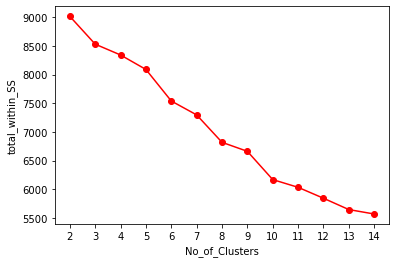

In [63]:
plt.plot(k,TWSS, 'ro-');
plt.xlabel("No_of_Clusters");
plt.ylabel("total_within_SS");
plt.xticks(k)


In [64]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)


KMeans(n_clusters=5)

In [65]:
# getting the labels of clusters assigned to each row 
model.labels_ 


array([1, 1, 1, ..., 1, 1, 1])

In [66]:
# converting numpy array into pandas series object
md=pd.Series(model.labels_)  

In [67]:
# creating a  new column and assigning it to new column 
Airlines['clust']=md 
df_norm.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.453132,-0.186954,-0.770641,-0.098579,-0.06298,-0.703448,-1.106223,-0.329439,-0.363081,1.389592,-0.767804
1,-0.541209,-0.186954,-0.770641,-0.098579,-0.06298,-0.701755,-1.002054,-0.329439,-0.363081,1.374057,-0.767804
2,-0.322378,-0.186954,-0.770641,-0.098579,-0.06298,-0.540335,-0.793716,-0.329439,-0.363081,1.406097,-0.767804
3,-0.585430,-0.186954,-0.770641,-0.098579,-0.06298,-0.689983,-1.106223,-0.329439,-0.363081,1.366290,-0.767804
4,0.235815,-0.186954,1.404867,-0.098579,-0.06298,1.077866,1.498005,1.149245,0.688174,1.358037,1.302087


In [74]:
Airlines = Airlines.iloc[:,[5,0,1,2,3,4]]

In [75]:
Airlines.iloc[:,1:7].groupby(Airlines.clust).mean()

,ID#,clust,cc1_miles,cc2_miles,cc3_miles
clust,,,,,
0,1728.238095,0,2.196429,1.000000,1.000000
1,2226.736505,1,1.234306,1.000000,1.000400
2,2269.372093,2,1.139535,2.348837,1.000000
3,1578.042605,3,3.725080,1.000000,1.001608
4,1664.866667,4,3.466667,1.000000,4.066667


In [76]:
Airlines.to_csv("C:/Users/Swetha/Downloads/EastWestAirlines.csv")
Airlines

,Bonus_miles,ID#,clust,cc1_miles,cc2_miles,cc3_miles
0,174,1,1,1,1,1
1,215,2,1,1,1,1
2,4123,3,1,1,1,1
3,500,4,1,1,1,1
4,43300,5,3,4,1,1
...,...,...,...,...,...,...
3966,37840,3989,3,4,1,1
3967,10599,3990,1,2,1,1
3968,3200,3991,1,1,1,1
3969,2069,3992,1,1,1,1
